In [17]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel

sys.path.append(os.path.abspath("../../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
# from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../basis"))
from basis.bspline import BSplineBasis
from basis.polynomial import PolynomialBasis
from basis.basis import Basis
from basis.fourier import FourierBasis

In [18]:
N = 6 # runs
epochs = 1_000
refinement_epochs = 100
x_base_1 = BSplineBasis(degree=3, num_basis_functions=10)
b_base_1 = PolynomialBasis(degree=2)
x_base_2 = BSplineBasis(degree=3, num_basis_functions=10)
b_base_2 = PolynomialBasis(degree=2)
bases_pairs = [(x_base_1, b_base_1),
               (x_base_2, b_base_2)]
x_bases = [x_base_1, x_base_2]

s_on_f_model = ScalarOnFunctionModel(bases_pairs=bases_pairs)

In [19]:
optimizer_s_on_f = CordexContinuous(model=s_on_f_model, runs=N)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs, refinement_epochs=refinement_epochs)

100%|██████████| 100/100 [00:03<00:00, 29.35it/s]


In [20]:
def split_array_by_columns(arr, col_splits):
    arrays = []
    start_col = 0
    for num_cols in col_splits:
        end_col = start_col + num_cols
        sub_array = arr[:, start_col:end_col]
        arrays.append(sub_array)
        start_col = end_col
    return arrays

In [21]:
split_coeffs = split_array_by_columns(best_design_s_on_f, [10, 10])
t_values = np.linspace(0,1,100)
y_values = [x_bases[j].evaluate_combination(split_coeffs[j][i], t_values)
            for i in range(N)
            for j in range(len(split_coeffs))]
y_values = np.array(y_values).reshape(N,len(x_bases),100)

In [22]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-v0_8')

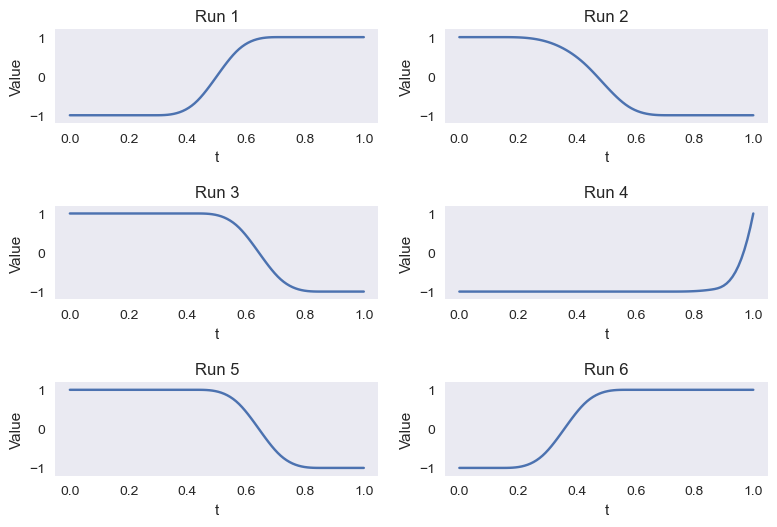

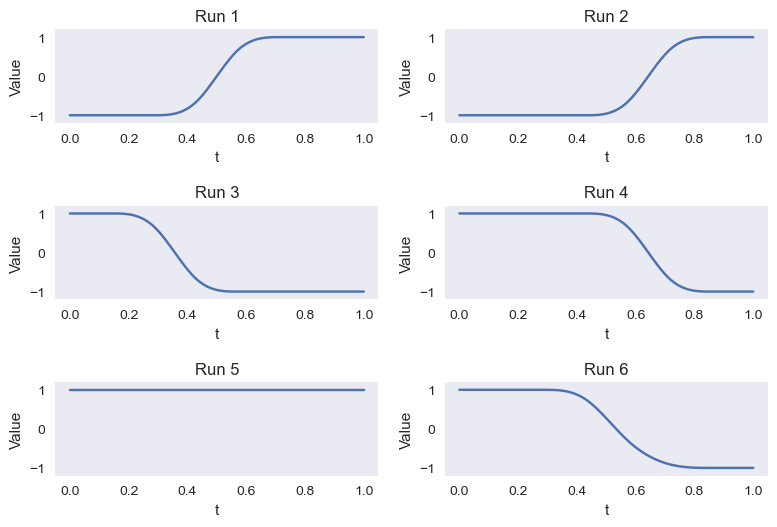

In [23]:
for i in range(y_values.shape[1]): # i bases
    fig, axes = plt.subplots(3, 2)
    axes = axes.flatten()
    for j in range(y_values.shape[0]): # j runs
        axes[j].plot(t_values, y_values[j][i])
        axes[j].set_title(f'Run {j+1}')
        axes[j].set_xlabel('t')
        axes[j].set_ylabel('Value')
        axes[j].grid(False)
        axes[j].set_ylim(-1.2, 1.2)
    plt.tight_layout()
    plt.show()